In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn.cluster
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Let's use the dataset we obtained after the PCA:

In [2]:
data = pd.read_csv('projected_data.csv')

In [105]:
data

CustomerID         0         1         2         3         4         5  \
0        C1010011 -2.155284  0.769231 -1.189896  0.716186  1.745473 -0.541324   
1        C1010012  0.445059 -0.064466 -0.637879  0.141632 -0.524193 -0.244923   
2        C1010014 -2.227886 -1.471651 -3.245768 -0.036780 -1.767338 -0.538044   
3        C1010018  0.450198  0.567593  0.297071  0.234391  0.120684  0.718028   
4        C1010024  0.424123  0.233544  0.049774  0.025525 -0.081511 -0.835705   
...           ...       ...       ...       ...       ...       ...       ...   
839076   C9099836  0.409660  0.310703 -0.210136 -0.173010 -1.165089  0.146822   
839077   C9099877  0.423432 -0.197570  1.234518  0.124302 -0.619169  0.063647   
839078   C9099919  0.444576  0.484345  0.097468  0.101022 -0.303486  0.771472   
839079   C9099941  0.434072  0.067364  1.087769  0.086990  0.386533 -0.104067   
839080   C9099956  0.448161  0.287808  1.148524  0.235588  0.423435  0.484654   

               6  
0      -1.235996  
1      -0.265704  
2      -1.215998  
3       0.434944  
4       0.453655  
...          ...  
839076 -0.183657  
839077 -0.331362  
839078  0.474309  
839079 -0.457665  
839080  0.557641  

[839081 rows x 8 columns]

In [3]:
relevant_df = data.drop(columns='CustomerID')

Let's standardize our dataset. Standardization prevents variables with larger scales from dominating how clusters are defined.\
It allows all variables to be considered by the algorithm with equal importance.

In [4]:
relevant_df = StandardScaler().fit_transform(relevant_df)
feat_cols = ['feature'+str(i) for i in range(1,8)]
relevant_df = pd.DataFrame(relevant_df,columns=feat_cols)

In [108]:
relevant_df

feature1  feature2  feature3  feature4  feature5  feature6  feature7
0      -2.117863  0.702667 -1.157617  0.729602  1.746538 -0.430960 -1.025258
1       0.437332 -0.058888 -0.620575  0.144285 -0.524512 -0.194989 -0.220401
2      -2.189205 -1.344304 -3.157718 -0.037469 -1.768416 -0.428350 -1.008670
3       0.442382  0.518477  0.289012  0.238782  0.120758  0.571639  0.360786
4       0.416759  0.213335  0.048424  0.026003 -0.081561 -0.665324  0.376307
...          ...       ...       ...       ...       ...       ...       ...
839076  0.402547  0.283816 -0.204436 -0.176251 -1.165800  0.116888 -0.152343
839077  0.416080 -0.180473  1.201029  0.126630 -0.619547  0.050671 -0.274865
839078  0.436858  0.442433  0.094824  0.102914 -0.303671  0.614186  0.393439
839079  0.426535  0.061535  1.058260  0.088619  0.386769 -0.082850 -0.379633
839080  0.440380  0.262903  1.117367  0.240002  0.423693  0.385844  0.462563

[839081 rows x 7 columns]

To obtain the optimal number of clusters into which to divide our dataset we sample and use KElbowVisualizer from yellowbrick.cluster.\
If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.\
In the following, the KElbowVisualizer fits the model for a range of K values from 3 to 50, which is set by the parameter k=(3,50).\
When the model is fit with 14 clusters we can see an "elbow" in the graph.

In [5]:
relevant_df_sample = relevant_df.sample(20000)

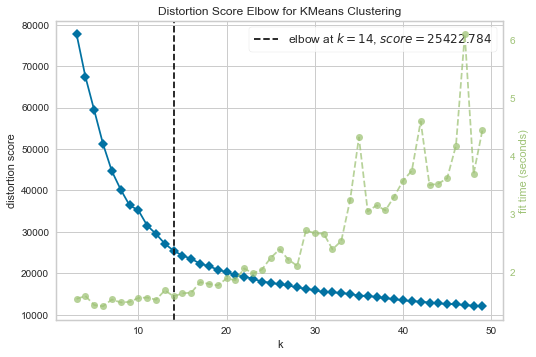

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [110]:
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(3,50))
visualizer.fit(relevant_df_sample)     
visualizer.show()  

We have now applied the elbow method using the already implemented version of kmeans++(from the scikit-learn library). \
We can see that although the optimal clustering number is almost the same, the distortion score is much lower.\
This may be due to the fact that in our case we have chosen a very low maximum iteration value for kmeans (mainly due to slow computation),\
but also because kmeans++ obviously performs better. K-means starts with allocating cluster centers randomly and then looks for "better" solutions.\
 K-means++ starts with allocation one cluster center randomly and then searches for other centers given the first one. \
So both algorithms use random initialization as a starting point, so can give different results on different runs. \
But since KMeans++ centers are distributed over the data it is more likely to have less cost(within cluster sum of square) then Kmeans.

In [111]:
model = KMeans(n_clusters=14,init='k-means++')

Let's plot our data to have a visual idea, just considering the first 3 principal components.

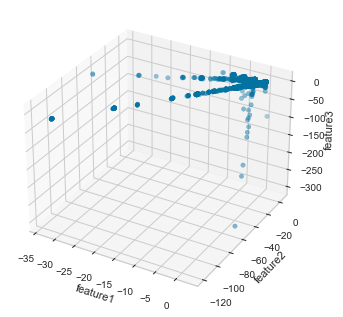

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = relevant_df['feature1']
y = relevant_df['feature2']
z = relevant_df['feature3']

# Plot the values
ax.scatter(x, y, z, c = 'b', marker='o')
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature3')

plt.show()

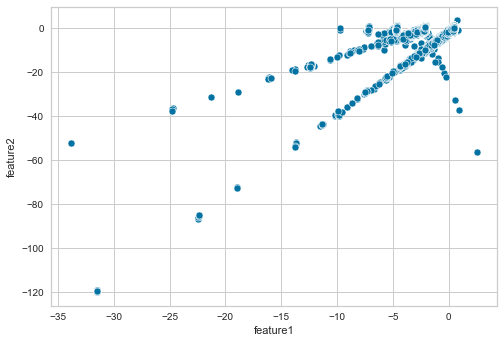

In [113]:
sns.scatterplot(x=relevant_df['feature1'],y=relevant_df['feature2'])
plt.show()

Time for Clustering

In [114]:
relevant_df['cluster'] = model.fit_predict(relevant_df)

In [116]:
relevant_df

feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0      -2.117863  0.702667 -1.157617  0.729602  1.746538 -0.430960 -1.025258   
1       0.437332 -0.058888 -0.620575  0.144285 -0.524512 -0.194989 -0.220401   
2      -2.189205 -1.344304 -3.157718 -0.037469 -1.768416 -0.428350 -1.008670   
3       0.442382  0.518477  0.289012  0.238782  0.120758  0.571639  0.360786   
4       0.416759  0.213335  0.048424  0.026003 -0.081561 -0.665324  0.376307   
...          ...       ...       ...       ...       ...       ...       ...   
839076  0.402547  0.283816 -0.204436 -0.176251 -1.165800  0.116888 -0.152343   
839077  0.416080 -0.180473  1.201029  0.126630 -0.619547  0.050671 -0.274865   
839078  0.436858  0.442433  0.094824  0.102914 -0.303671  0.614186  0.393439   
839079  0.426535  0.061535  1.058260  0.088619  0.386769 -0.082850 -0.379633   
839080  0.440380  0.262903  1.117367  0.240002  0.423693  0.385844  0.462563   

        cluster  
0             6  
1             7  
2             2  
3             1  
4             1  
...         ...  
839076        7  
839077        0  
839078        1  
839079        0  
839080        0  

[839081 rows x 8 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

c:\Users\Angelo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


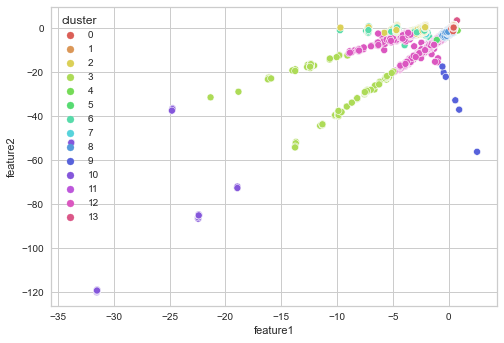

In [117]:
unique_values = len(relevant_df.cluster.unique())

sns.scatterplot(x=relevant_df['feature1'], 
                y=relevant_df['feature2'],
                palette=sns.color_palette('hls', unique_values),
               hue=relevant_df.cluster)

Let's visualize now the clustering in 3d, considering the first 3 principal components.

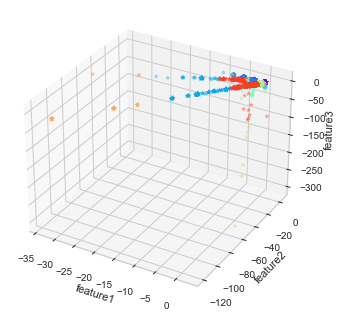

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = cm.rainbow(np.linspace(0, 1, len(relevant_df.cluster.unique())))
relevant_df['c'] = relevant_df.cluster.map({i:colors[i] for i in range(0,14)})

x = relevant_df['feature1']
y = relevant_df['feature2']
z = relevant_df['feature3']

# Plot the values
ax.scatter(x, y, z, c = relevant_df.c, marker='*')
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature3')

plt.show()

Let's plot the centroids in 3d

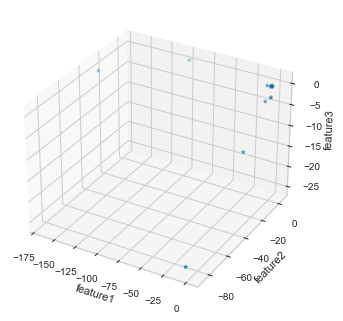

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = model.cluster_centers_[:,2]
y = model.cluster_centers_[:,1]
z = model.cluster_centers_[:,0]

# Plot the values
ax.scatter(x, y, z, c = 'b', marker='*')
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature3')

plt.show()

In [121]:
relevant_df.drop(columns='c',inplace=True)

In [122]:
relevant_df.to_pickle('relevant_df_pca.pkl')

In [20]:
relevant_df = pd.read_pickle('relevant_df_pca.pkl')

In [123]:
#to have an idea how big is every cluster
relevant_df.groupby('cluster').count()

feature1  feature2  feature3  feature4  feature5  feature6  feature7
cluster                                                                      
0          180491    180491    180491    180491    180491    180491    180491
1          275750    275750    275750    275750    275750    275750    275750
2          106989    106989    106989    106989    106989    106989    106989
3             154       154       154       154       154       154       154
4              30        30        30        30        30        30        30
5            3637      3637      3637      3637      3637      3637      3637
6           20128     20128     20128     20128     20128     20128     20128
7           79468     79468     79468     79468     79468     79468     79468
8          116988    116988    116988    116988    116988    116988    116988
9               6         6         6         6         6         6         6
10             31        31        31        31        31        31        31
11          53272     53272     53272     53272     53272     53272     53272
12           2136      2136      2136      2136      2136      2136      2136
13              1         1         1         1         1         1         1

Now we can add the cluster column created to the starting dataset, since the starting dataset is not standardized.

In [125]:
df = pd.read_pickle('customer_engineered.pkl')
df['cluster']=relevant_df['cluster']
df

CustomerID  Number of transactions  Number of high volume transactions  \
0        C1010011                       2                                 2.0   
1        C1010012                       1                                 1.0   
2        C1010014                       2                                 2.0   
3        C1010018                       1                                 0.0   
4        C1010024                       1                                 1.0   
...           ...                     ...                                 ...   
839076   C9099836                       1                                 1.0   
839077   C9099877                       1                                 1.0   
839078   C9099919                       1                                 0.0   
839079   C9099941                       1                                 1.0   
839080   C9099956                       1                                 0.0   

        AVG Transaction  AVG Balance  AVG Utilization Most common gender  \
0                30.636    916.08762        885.45162                  F   
1                17.988    290.45388        272.46588                  M   
2                 8.730   1201.35540       1192.62540                  F   
3                 0.360      5.95416          5.59416                  F   
4                60.000   1044.70380        984.70380                  M   
...                 ...          ...              ...                ...   
839076            8.292   1596.80676       1588.51476                  M   
839077            2.664   1152.76152       1150.09752                  M   
839078            1.512     66.71700         65.20500                  M   
839079            0.600    423.55104        422.95104                  M   
839080           10.260     83.62716         73.36716                  M   

       Most frequent location  CustomerAge  MAX Transaction  ...  \
0                   NEW DELHI           30           57.000  ...   
1                      MUMBAI           28           17.988  ...   
2                      MUMBAI           31           14.460  ...   
3                   CHAMPARAN           33            0.360  ...   
4                     KOLKATA           57           60.000  ...   
...                       ...          ...              ...  ...   
839076               BHIWANDI           32            8.292  ...   
839077              BANGALORE           26            2.664  ...   
839078                 GUNTUR           29            1.512  ...   
839079                CHENNAI           28            0.600  ...   
839080              MUSSOORIE           40           10.260  ...   

        Max Utilization  Min Utilization  Last transaction  First transaction  \
0            1437.89448        333.00876        2016-09-26         2016-09-08   
1             272.46588        272.46588        2016-08-14         2016-08-14   
2            1939.18512        446.06568        2016-07-08         2016-01-08   
3               5.59416          5.59416        2016-09-15         2016-09-15   
4             984.70380        984.70380        2016-08-18         2016-08-18   
...                 ...              ...               ...                ...   
839076       1588.51476       1588.51476        2016-07-08         2016-07-08   
839077       1150.09752       1150.09752        2016-09-15         2016-09-15   
839078         65.20500         65.20500        2016-08-18         2016-08-18   
839079        422.95104        422.95104        2016-08-28         2016-08-28   
839080         73.36716         73.36716        2016-09-25         2016-09-25   

        Mean time between transactions  Balance traction  \
0                              18 days          2.697780   
1                               0 days          0.000000   
2                             182 days          3.217322   
3                               0 days          0.000000   
4                              

## 2.4 Analysing your results!
You are often encouraged to explain the main characteristics that your clusters have. This is called the Characterizing Clusters step. Thus, follow the next steps to do it:
* Select 2-3 variables you think are relevant to identify the cluster of the customer. For example, CustGender, Number of transactions, etc.
* Most of your selected variables will be numerical (continuous or discrete), then categorise them into four categories.
* With the selected variables, perform pivot tables. On the horizontal axis, you will have the clusters, and on the vertical axis, you will have the categories of each variable. Notice that you have to do one pivot table per variable.
* Calculate the percentage by column for each pivot table. The sum of each row (cluster) must be 100. The sample example for clustering with K = 4 and Gender variable:
* Interpret the results for each pivot table.

The 3 variables we have chosen that are relevant for us are 'CustomerAge', 'AVG Balance' and 'Most common gender'.

As requested we categorize every variable in 4 categories.\
We have slittled 'CustomerAge' into 4 categories:
* Young: customer with an age between 0 and 30
* Adult: customer with an age between 30 and 50
* Old: customer with an age between 50 and 75
* Reired: customer with an age between 75 and the maximum value


In [126]:
df['Age_Category'] = pd.cut(df['CustomerAge'],bins=[-1,30,50,75,123],labels=['Young','Adult','Old','Retired'])
table = df.pivot_table(index='cluster',columns = 'Age_Category',aggfunc='count',fill_value=0)['CustomerAge']
round(table.div(table.sum(axis=1), axis=0)*100,2)

Age_Category  Young   Adult    Old  Retired
cluster                                    
0             16.95   75.78   6.91     0.36
1             19.56   73.48   6.56     0.40
2             17.75   74.53   7.27     0.46
3              2.60   37.66  59.09     0.65
4              3.33   60.00  36.67     0.00
5              7.48   66.32  24.25     1.95
6             14.92   75.80   8.55     0.72
7             15.68   76.01   7.73     0.58
8             15.34   74.81   9.33     0.52
9              0.00   83.33  16.67     0.00
10             0.00   12.90  35.48    51.61
11            13.06   76.70   9.48     0.76
12             3.09   64.79  29.26     2.86
13             0.00  100.00   0.00     0.00

As we can see the clustering made a decent partition of the variable 'CustomerAge'. \
This tells us that the algorithm had an acceptable capability to create a partition between objects that have similar characteristics,\
and thus minimise the distance correctly.All the other clusters always contain more of one category than the others.\
For example, through this partition one might be able to generate category-specific bank offers.

We have slittled 'AVG Balance' into 4 categories:
* Basic: customer with an average balance between 0 and 1000
* Platinum	: customer with an average balance between 1000 and 10000
* Silver: customer with an average balance between 10000 and 100000
* Gold: customer with an average balance between 100000 and the maximum value

In [127]:
df['Balance_type'] = pd.cut(df['AVG Balance'],bins=[-1,1000,10000,100000,1380426],labels=['Basic','Platinum','Silver','Gold'])
table = df.pivot_table(index='cluster',columns = 'Balance_type',aggfunc='count',fill_value=0)['AVG Balance']
round(table.div(table.sum(axis=1), axis=0)*100,2)

Balance_type   Basic  Platinum  Silver    Gold
cluster                                       
0              84.92     15.03    0.05    0.00
1              87.29     12.66    0.05    0.00
2              78.10     20.80    1.10    0.00
3               0.00      0.00    0.00  100.00
4              43.33     40.00   16.67    0.00
5              50.21     38.96   10.59    0.25
6              71.63     26.23    2.14    0.00
7              78.74     20.04    1.21    0.00
8              70.39     21.48    8.13    0.00
9               0.00     83.33   16.67    0.00
10              0.00      0.00    0.00  100.00
11             75.04     22.11    2.85    0.00
12              0.00      0.14   80.90   18.96
13            100.00      0.00    0.00    0.00

As we can see the clustering make a good partition of the variable 'AVG Balance'. The cluster 3, 10 and 13 contain transactions relating only to a certain category.\
This tells us that the algorithm was able to create a partition between objects that have similar characteristics, and thus minimise the distance correctly\
Also the other clusters always contain more of one category than the others, which means that even here you can get a good partition.

We have slittled 'Gender_Cust' into 2 categories just considering 'Most common gender':
* Female
* Male

In [128]:
df['Gender_Cust']=np.where(df['Most common gender']=='F',1,0)
table = df.pivot_table(index='cluster',columns = 'Most common gender',aggfunc='count',fill_value=0)['Gender_Cust']
round(table.div(table.sum(axis=1), axis=0)*100,2)


Most common gender      F       M
cluster                          
0                   28.15   71.85
1                   26.36   73.64
2                   44.50   55.50
3                   17.53   82.47
4                   30.00   70.00
5                   29.89   70.11
6                   44.46   55.54
7                   29.58   70.42
8                   27.41   72.59
9                   16.67   83.33
10                  58.06   41.94
11                  30.84   69.16
12                  23.55   76.45
13                   0.00  100.00

We can say exactly the same comment above.

### 6.
Use any known metrics to estimate clustering algorithm performance (how good are the clusters you found?).

c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


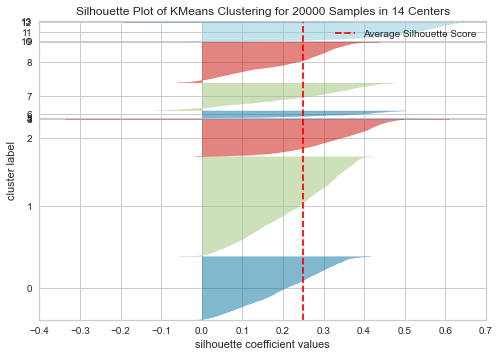

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20000 Samples in 14 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [131]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
relevant_df_sample = relevant_df.sample(20000)
visualizer.fit(relevant_df_sample)        # Fit the data to the visualizer
visualizer.show()       

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). \
The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and\
poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate.\
Silhouette is a measure of how a clustering algorithm has performed. After computing the silhouette coefficient of each point in the dataset,\
plot it to get a visual representation of how well the dataset is clustered into k clusters. The silhouette plot displays a measure of how\
close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like the number\
of clusters visually. This measure has a range of [-1, 1].\
Since in this case the silhouette coefficient value is 0.25 approximately we can say that a reasonable structure has been found.